In [1]:
from os.path import join
import tensorflow as tf

from src.image_handling import create_example_decoder

processed = join('data', 'processed')
record_path = join(processed, 'train.tfrecord')

decoder = create_example_decoder({ 
    'image': tf.io.FixedLenFeature([], tf.string),
    'label': tf.io.FixedLenFeature([], tf.int64)
}, shape=(32, 32, 1))

dataset = tf.data.TFRecordDataset(record_path)

example_iterator = dataset.map(decoder).take(10)

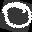

1

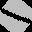

0

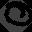

1

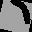

0

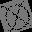

2

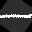

0

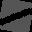

0

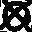

2

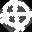

2

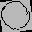

1

In [2]:
from IPython.display import display
from PIL import Image

for image, label in example_iterator:
    img = tf.image.convert_image_dtype(image, tf.uint8)
    size = list(img.shape[:-1])
    display(Image.frombytes(mode='L', data=img.numpy(), size=size))
    display(label.numpy())